## Project Requirements
Analyze the fuel efficiency (`mpg`) of cars using the `auto-mpg.csv` dataset, perform data cleaning and preprocessing including handling missing values, converting categorical features, and normalizing numerical features. Then, build, train, and evaluate a TensorFlow deep learning model to predict `mpg` and visualize its performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

## Explore and Clean Data

Inspect the `df` DataFrame for missing values and data types. Handle any missing values, particularly in the 'horsepower' column, and convert 'horsepower' to a numeric type if necessary. Also, remove the 'car name' column as it's not relevant for prediction.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/LinkedInProjects/AI/Dataset/auto-mpg.csv')
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
df.shape

(398, 9)

The first step is to inspect the DataFrame for missing values across all columns.


In [4]:
print(df.isnull().sum())
print("Printed the count of missing values for each column.")

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
Printed the count of missing values for each column.


After checking for missing values, the next step is to examine the data types of all columns in the `df` DataFrame using the `.info()` method.



In [5]:
df.info()
print("Printed the data types and non-null counts for each column.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
Printed the data types and non-null counts for each column.


Since `df.info()` showed 'horsepower' as an object type, it's necessary to identify and replace any non-numeric entries with `np.nan` before converting the column to a numeric type.


In [6]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print("Converted 'horsepower' column to numeric, coercing non-numeric values to NaN.")
print(f"Number of NaN values introduced in 'horsepower': {df['horsepower'].isnull().sum()}")

Converted 'horsepower' column to numeric, coercing non-numeric values to NaN.
Number of NaN values introduced in 'horsepower': 6


Now that non-numeric values in 'horsepower' have been converted to `np.nan`, the next step is to fill these missing values.



In [7]:
median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)
print(f"Filled missing values in 'horsepower' with the median: {median_horsepower}")
print(f"Remaining NaN values in 'horsepower': {df['horsepower'].isnull().sum()}")

Filled missing values in 'horsepower' with the median: 93.5
Remaining NaN values in 'horsepower': 0


The final step in the subtask is to remove the 'car name' column from the `df` DataFrame as it is not relevant for the prediction task.



In [8]:
df.drop('car name', axis=1, inplace=True)
print("Removed the 'car name' column from the DataFrame.")
print(f"Current columns: {df.columns.tolist()}")

Removed the 'car name' column from the DataFrame.
Current columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


## Convert Categorical Features

Convert the 'origin' column, which is a categorical feature, into one-hot encoded numerical representation using `pd.get_dummies`.


In [9]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin')
print("One-hot encoded 'origin' column and concatenated with the DataFrame.")
print(f"Current columns: {df.columns.tolist()}")

One-hot encoded 'origin' column and concatenated with the DataFrame.
Current columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3']


## Split Data

Separate the dataset into features (X) and target (y), where 'mpg' is the target variable. Then, split the data into training and testing sets to prepare for model building.


In [10]:
X = df.drop('mpg', axis=1)
y = df['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (318, 9)
X_test shape: (80, 9)
y_train shape: (318,)
y_test shape: (80,)


## Normalize Features

Normalize the numerical features using `tf.keras.layers.Normalization` to ensure that all features contribute equally to the model's training, improving stability and performance.


In [11]:
X_train_np = np.array(X_train)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train_np)

print("Converted X_train to NumPy array and adapted the Normalization layer.")

Converted X_train to NumPy array and adapted the Normalization layer.


## Build TensorFlow Model

Construct a deep learning model using TensorFlow and Keras. The model should include a normalization layer, followed by several dense layers with 'relu' activation, and an output layer for regression.


In [12]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.summary()
print("Built and summarized the TensorFlow Keras model.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (318, 9)               │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

Built and summarized the TensorFlow Keras model.


## Compile TensorFlow Model

Compile the constructed TensorFlow Keras model. This involves specifying the optimizer, the loss function, and any metrics to monitor during training.

In [13]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

print("Compiled the TensorFlow Keras model with Adam optimizer, MSE loss, and MAE metric.")

Compiled the TensorFlow Keras model with Adam optimizer, MSE loss, and MAE metric.


## Train TensorFlow Model

Train the compiled TensorFlow Keras model using the training data (`X_train` and `y_train`). Monitor the training process by specifying the number of epochs and batch size, and observe the metrics defined during compilation.

In [15]:
history = model.fit(
    X_train_np.astype(np.float32), # Ensure X_train_np has a numeric dtype
    y_train,
    epochs=100,  # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    verbose=0 # Set to 1 for progress bar, 0 for silent
)

print("Model training completed. History object contains training metrics.")

Model training completed. History object contains training metrics.


## Evaluate Model Performance

Evaluate the trained model's performance on the test set using metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE).


In [16]:
X_test_np = np.array(X_test).astype(np.float32)
y_pred = model.predict(X_test_np)

loss, mae = model.evaluate(X_test_np, y_test, verbose=0)

print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Test Loss (MSE): 4.8719
Test Mean Absolute Error (MAE): 1.7326


## Visualize Predictions

Generate a scatter plot to visualize the model's predictions against the actual 'mpg' values from the test set.


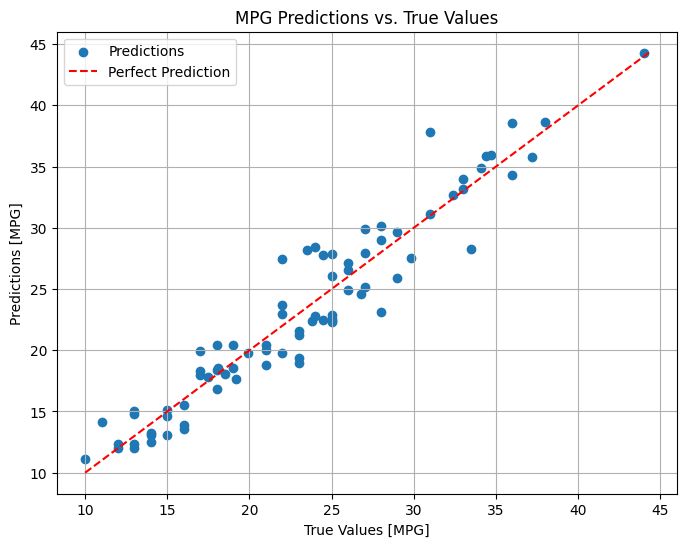

Generated a scatter plot showing model predictions against true values.


In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Predictions')

# Calculate min and max for the perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.title('MPG Predictions vs. True Values')
plt.legend()
plt.grid(True)
plt.show()

print("Generated a scatter plot showing model predictions against true values.")

### Data Analysis Key Findings
*   Numerical features were normalized using a `tf.keras.layers.Normalization` layer, which adapted to the training data to calculate means and variances for scaling.
*   A TensorFlow Keras deep learning model was constructed with a normalization layer, two hidden layers of 64 neurons each (using ReLU activation), and a single-neuron output layer.
*   The model was compiled using the Adam optimizer, Mean Squared Error (MSE) as the loss function, and Mean Absolute Error (MAE) as a monitoring metric.
*   After resolving an initial `ValueError` by explicitly casting the input data to `np.float32`, the model was successfully trained for 100 epochs.
*   On the test set, the model achieved a Mean Squared Error (MSE) of approximately 4.8719 and a Mean Absolute Error (MAE) of approximately 1.7326.
*   A scatter plot visualizing predictions against true values showed a reasonable alignment along the perfect prediction line, indicating that the model captures the underlying relationship.